<a href="https://colab.research.google.com/github/tatianamorenoa/Trabalho_final/blob/main/Codigo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('BancoBaependi1587.xlsx', sheet_name='BancoBaependi1587')

In [ ]:
data_lines = """IID    Sexo Edad IMC             BAI             Cintura Cadera CVLDL Triglic CTOTAL CLDL  CHDL
1101   1    69   200453254173449 163973606035193 81      92     29.1  145.4   168.3  27.9  111.3
1201   2    63   228328793462586 227848987457178 81      102    25.4  127.2   263.3  109.5 128.4"""

In [ ]:
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Dimensiones del dataset: (1587, 12)
Número de registros: 1587
Número de variables: 12


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IID      1587 non-null   int64  
 1   Sexo     1587 non-null   int64  
 2   Edad     1587 non-null   int64  
 3   IMC      1587 non-null   float64
 4   BAI      1587 non-null   int64  
 5   Cintura  1587 non-null   int64  
 6   Cadera   1587 non-null   int64  
 7   CVLDL    1587 non-null   float64
 8   Triglic  1587 non-null   float64
 9   CTOTAL   1587 non-null   float64
 10  CLDL     1587 non-null   float64
 11  CHDL     1587 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 148.9 KB
None


In [ ]:
print(df.describe())

                 IID         Sexo         Edad           IMC           BAI  \
count    1587.000000  1587.000000  1587.000000  1.587000e+03  1.587000e+03   
mean    61134.683680     1.567738    44.097669  2.136145e+14  2.218316e+14   
std     35385.313165     0.495546    16.999219  9.103282e+13  9.974663e+13   
min      1101.000000     1.000000    17.000000  2.080000e+01  1.936997e+11   
25%     28926.500000     1.000000    30.000000  1.961328e+14  1.707279e+14   
50%     61702.000000     2.000000    43.000000  2.291299e+14  2.213687e+14   
75%     91919.500000     2.000000    56.000000  2.650850e+14  2.758850e+14   
max    122401.000000     2.000000    98.000000  4.919502e+14  9.645401e+14   

           Cintura       Cadera        CVLDL      Triglic       CTOTAL  \
count  1587.000000  1587.000000  1587.000000  1587.000000  1587.000000   
mean     87.263390    97.830498    26.628859   131.672968   180.768179   
std      12.317006     9.988689    18.842513    70.381810    47.410663   
m

In [ ]:
print(df.isnull().sum())

IID        0
Sexo       0
Edad       0
IMC        0
BAI        0
Cintura    0
Cadera     0
CVLDL      0
Triglic    0
CTOTAL     0
CLDL       0
CHDL       0
dtype: int64


In [ ]:
# Eliminar columnas no relevantes para la predicción (ID)
X = df.drop(['IID'], axis=1)

print(X.describe())

              Sexo         Edad           IMC           BAI      Cintura  \
count  1587.000000  1587.000000  1.587000e+03  1.587000e+03  1587.000000   
mean      1.567738    44.097669  2.136145e+14  2.218316e+14    87.263390   
std       0.495546    16.999219  9.103282e+13  9.974663e+13    12.317006   
min       1.000000    17.000000  2.080000e+01  1.936997e+11    54.000000   
25%       1.000000    30.000000  1.961328e+14  1.707279e+14    78.000000   
50%       2.000000    43.000000  2.291299e+14  2.213687e+14    86.000000   
75%       2.000000    56.000000  2.650850e+14  2.758850e+14    95.000000   
max       2.000000    98.000000  4.919502e+14  9.645401e+14   144.000000   

            Cadera        CVLDL      Triglic       CTOTAL         CLDL  \
count  1587.000000  1587.000000  1587.000000  1587.000000  1587.000000   
mean     97.830498    26.628859   131.672968   180.768179    98.570762   
std       9.988689    18.842513    70.381810    47.410663    43.763440   
min      51.000000 

In [ ]:
# Variable riesgo

def definir_riesgo(row):
    riesgo = 0  # Bajo riesgo por defecto

    # Criterio 1: CTOTAL alto (> 200 mg/dL)
    if row['CTOTAL'] > 200:
        riesgo += 1

    # Criterio 2: CLDL alto (> 130 mg/dL)
    if row['CLDL'] > 130:
        riesgo += 1

    # Criterio 3: CHDL bajo (< 40 mg/dL)
    if row['CHDL'] < 40:
        riesgo += 1

    # Criterio 4: Triglicéridos altos (> 150 mg/dL)
    if row['Triglic'] > 150:
        riesgo += 1

    # Criterio 5: Edad avanzada (> 50 años)
    if row['Edad'] > 50:
        riesgo += 1

    # Criterio 6: Sexo masculino (mayor riesgo)
    if row['Sexo'] == 1:  # 1 = masculino
        riesgo += 1

    # Si cumple 3 o más criterios, considerar alto riesgo
    return 1 if riesgo >= 3 else 0

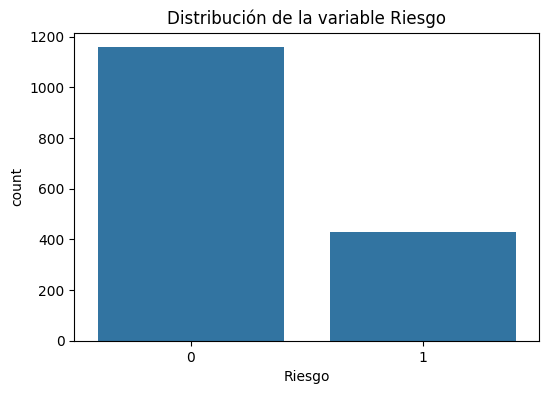

In [ ]:
plt.figure(figsize=(6,4))
df['Riesgo'] = y
sns.countplot(x='Riesgo', data=df)
plt.title("Distribución de la variable Riesgo")
plt.show()

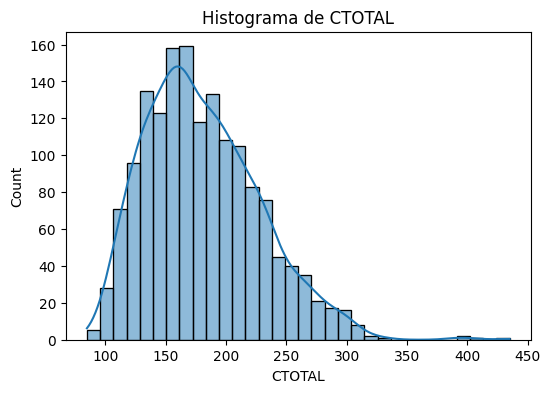

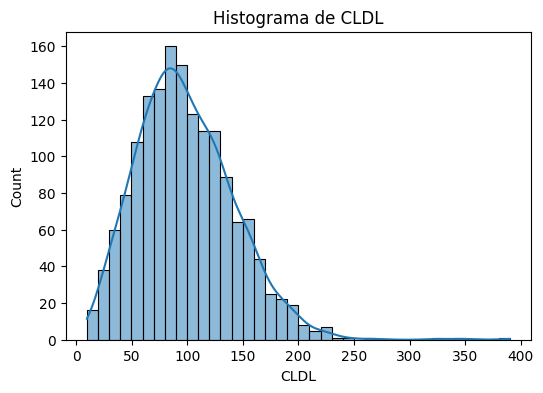

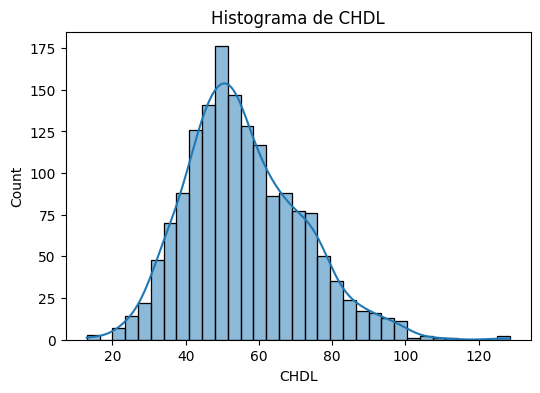

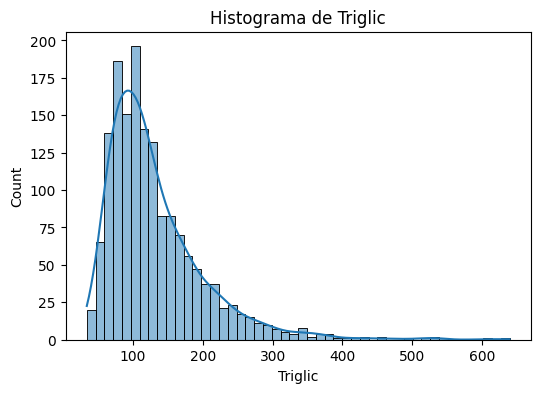

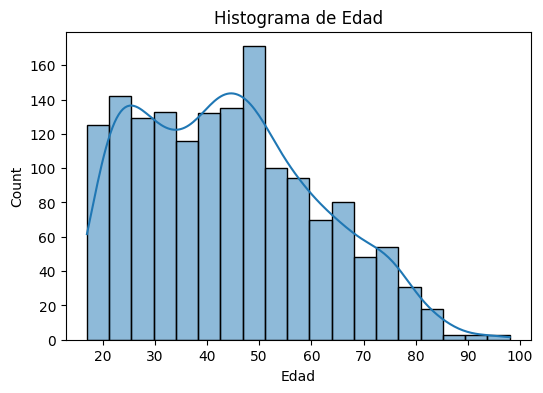

In [ ]:
variables = ['CTOTAL','CLDL','CHDL','Triglic','Edad']

for col in variables:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.show()

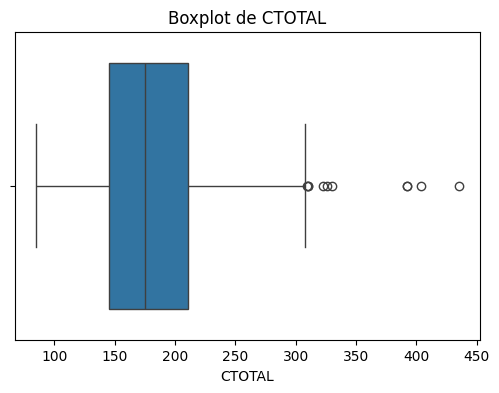

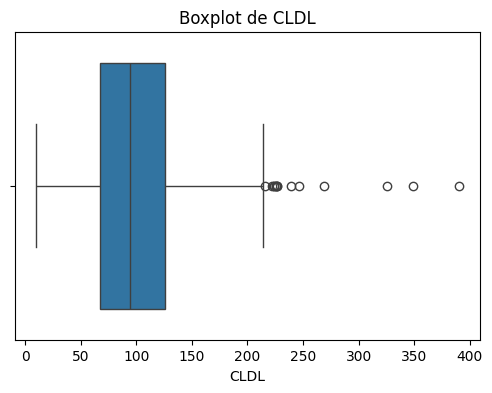

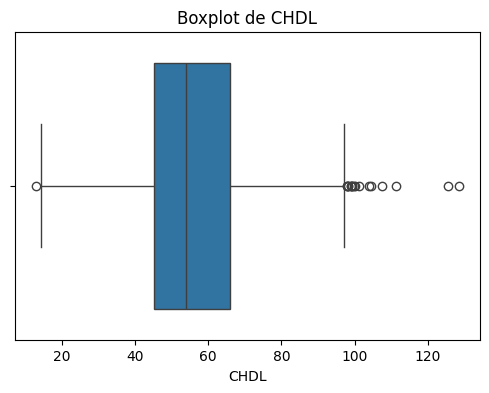

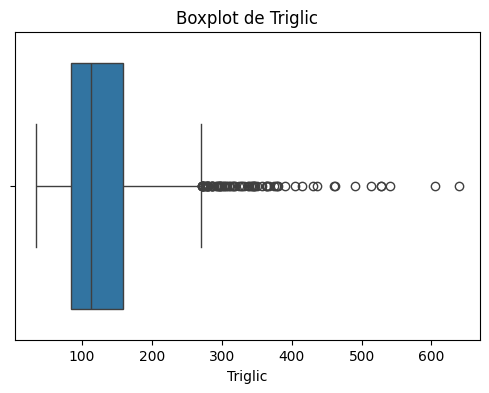

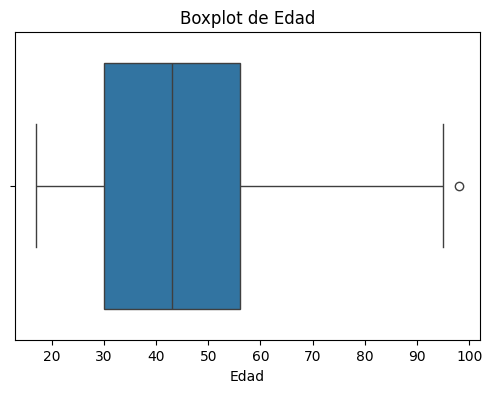

In [ ]:
for col in variables:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

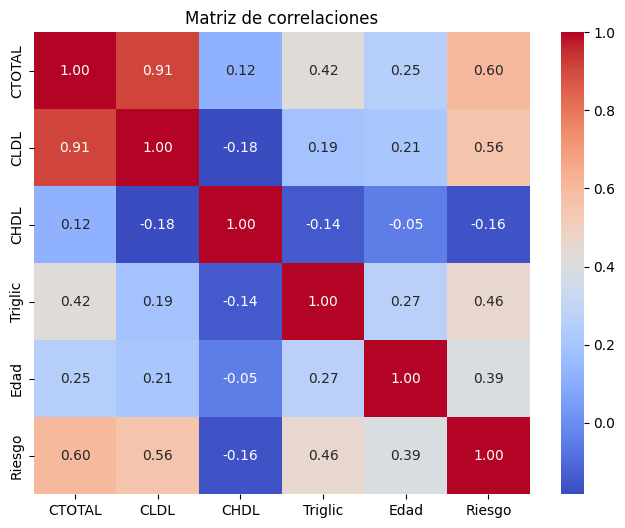

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['CTOTAL','CLDL','CHDL','Triglic','Edad','Riesgo']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

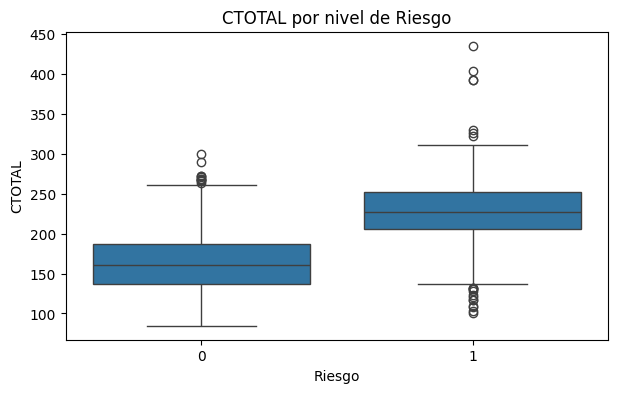

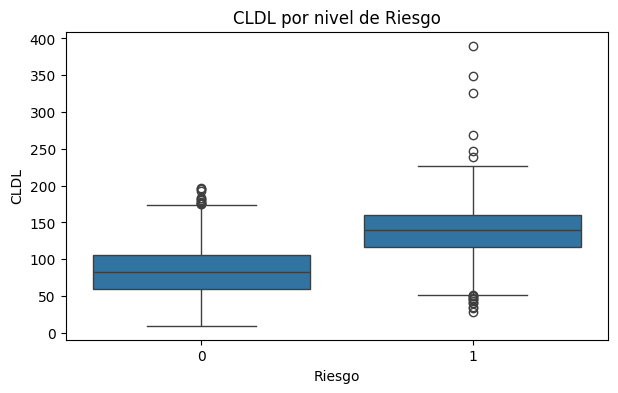

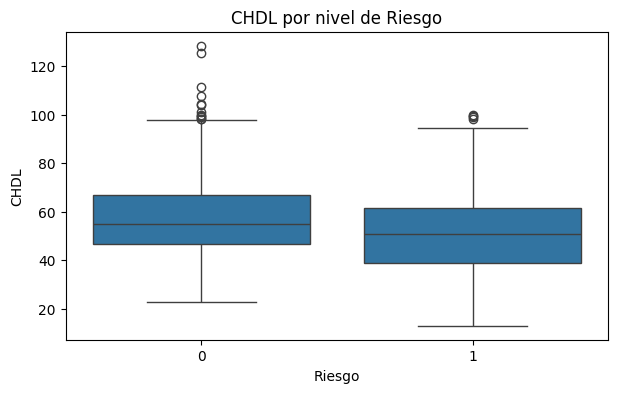

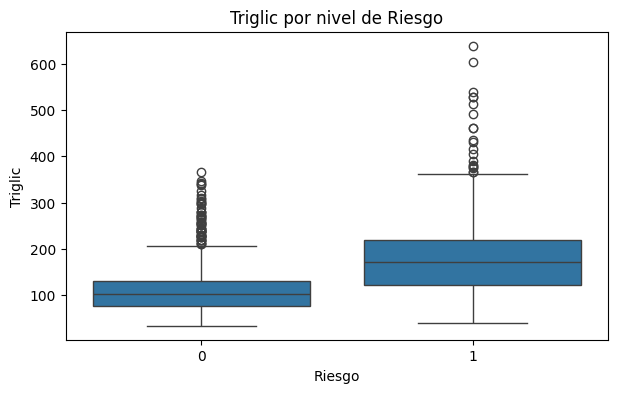

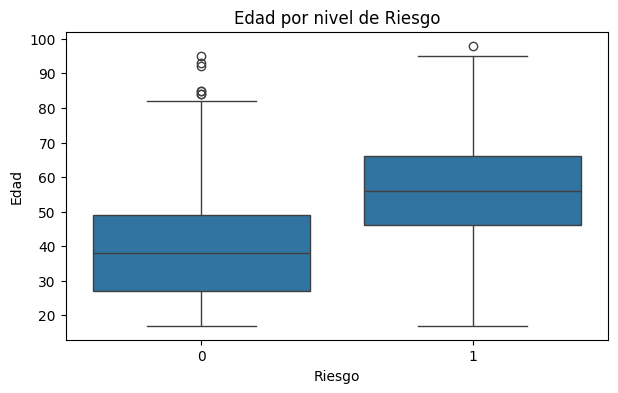

In [ ]:
for col in variables:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Riesgo', y=col, data=df)
    plt.title(f"{col} por nivel de Riesgo")
    plt.show()

In [ ]:
y = X.apply(definir_riesgo, axis=1)

print(f"Distribución de riesgo cardiovascular:")
print(f"Alto riesgo (1): {sum(y == 1)} pacientes")
print(f"Bajo riesgo (0): {sum(y == 0)} pacientes")
print(f"Proporción: {sum(y == 1)/len(y)*100:.2f}% alto riesgo")


Distribución de riesgo cardiovascular:
Alto riesgo (1): 429 pacientes
Bajo riesgo (0): 1158 pacientes
Proporción: 27.03% alto riesgo


In [ ]:
# Eliminar las columnas usadas para definir riesgo (para evitar data leakage)
X = X.drop(['CTOTAL', 'CLDL', 'CHDL', 'Triglic'], axis=1)

print(f"\nVariables predictoras restantes: {list(X.columns)}")


Variables predictoras restantes: ['Sexo', 'Edad', 'IMC', 'BAI', 'Cintura', 'Cadera', 'CVLDL']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"Proporción de riesgo en entrenamiento: {sum(y_train)/len(y_train)*100:.2f}%")
print(f"Proporción de riesgo en prueba: {sum(y_test)/len(y_test)*100:.2f}%")


Conjunto de entrenamiento: 1269 muestras
Conjunto de prueba: 318 muestras
Proporción de riesgo en entrenamiento: 27.03%
Proporción de riesgo en prueba: 27.04%


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3422 - loss: 0.8867 - precision: 0.3016 - recall: 0.9521 - val_accuracy: 0.7717 - val_loss: 0.7091 - val_precision: 0.7742 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7111 - loss: 0.7028 - precision: 0.4137 - recall: 0.3135 - val_accuracy: 0.7047 - val_loss: 0.6402 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7131 - loss: 0.6255 - precision: 0.4409 - recall: 0.0339 - val_accuracy: 0.7165 - val_loss: 0.5774 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7613 - loss: 0.5574 - precision: 0.6363 - recall: 0.0855 - val_accuracy: 0.7677 - val_loss: 0.5268 - val_precision: 0.7857 - val_recall: 0.2933 - learning_rate: 0.0010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy:

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
    X_test_scaled, y_test, verbose=0
)

In [ ]:
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

Loss: 0.4348
Accuracy: 0.8176


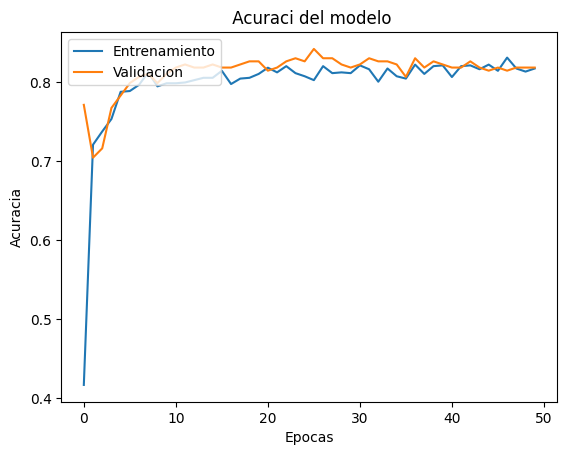

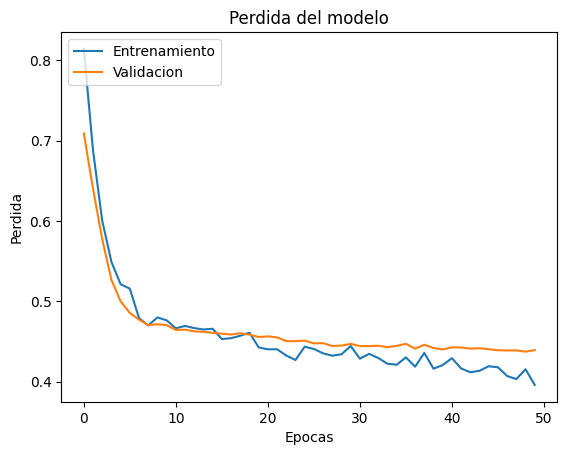

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(' Acuraci del modelo')
plt.ylabel('Acuracia')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step



Matriz de Confusión:
        Pred 0  Pred 1
True 0     211      21
True 1      37      49


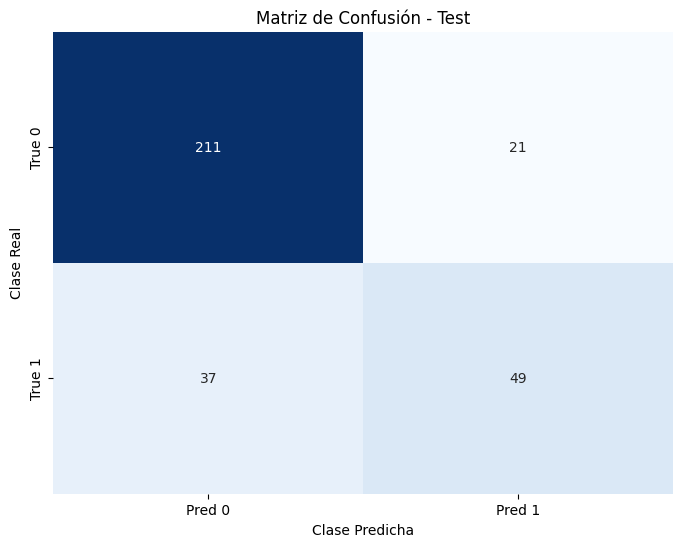

              precision    recall  f1-score   support

     Clase 0       0.85      0.91      0.88       232
     Clase 1       0.70      0.57      0.63        86

    accuracy                           0.82       318
   macro avg       0.78      0.74      0.75       318
weighted avg       0.81      0.82      0.81       318



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['True 0', 'True 1'],
                              columns=['Pred 0', 'Pred 1'])

print("\nMatriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Test')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1']))